In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [7]:
# Load Data & Clean
filepath = 'data/raw/movies.csv'  # Path check karlena
df = pd.read_csv(filepath, encoding='latin-1')

print("Original Data Shape:", df.shape)

# 1. Drop rows jinki rating gayab hai
df.dropna(subset=['Rating'], inplace=True)

# 2. Year Clean: '(2019)' -> 2019
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(float)

# 3. Duration Clean: '120 min' -> 120
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

# 4. Votes Clean: '5,000' -> 5000
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# 5. Missing Duration Fill (Median se)
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

print("✅ Data Cleaning Complete!")
print("New Data Shape:", df.shape)
df.head()

Original Data Shape: (15509, 10)
✅ Data Cleaning Complete!
New Data Shape: (7919, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


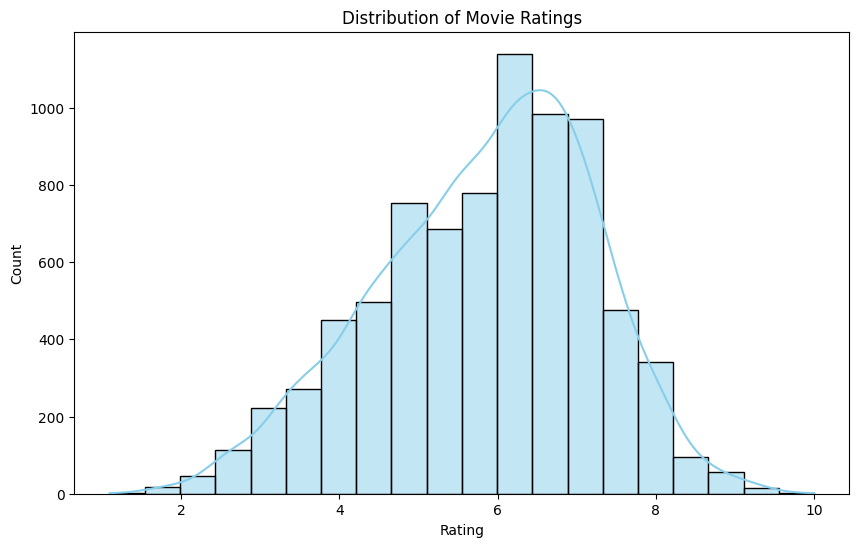


Top 10 Directors by Average Rating:
Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Ashish Dubey        9.4
Gautam Joshi        9.3
Rahul Mallick       9.3
Venkatesh Bk        9.3
Name: Rating, dtype: float64


In [ ]:
# Exploratory Data Analysis (Graphs)

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 Directors (Avg Rating)
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Directors by Average Rating:")
print(top_directors)

In [ ]:
# Cell 4: Feature Engineering (Encoding)

# Mean Encoding (Genre ka Avg Rating, Actor ka Avg Rating, etc.)
genre_map = df.groupby('Genre')['Rating'].mean().to_dict()
director_map = df.groupby('Director')['Rating'].mean().to_dict()
actor_map = df.groupby('Actor 1')['Rating'].mean().to_dict()
overall_mean = df['Rating'].mean()

# Map values to new columns
df['Genre_Encoded'] = df['Genre'].map(genre_map)
df['Director_Encoded'] = df['Director'].map(director_map)
df['Actor1_Encoded'] = df['Actor 1'].map(actor_map)


cols_to_fix = ['Genre_Encoded', 'Director_Encoded', 'Actor1_Encoded']
for col in cols_to_fix:
    df[col] = df[col].fillna(overall_mean)

print("✅ Encoding Done! Text converted to Numbers.")
df[['Genre', 'Genre_Encoded', 'Director', 'Director_Encoded']].head()

✅ Encoding Done! Text converted to Numbers.


,Genre,Genre_Encoded,Director,Director_Encoded
1,Drama,6.352082,Gaurav Bakshi,7.000000
3,"Comedy, Romance",5.722500,Ovais Khan,4.400000
5,"Comedy, Drama, Musical",6.224490,Rahul Rawail,5.358824
6,"Drama, Romance, War",6.820000,Shoojit Sircar,7.500000
8,"Horror, Mystery, Thriller",5.463636,Allyson Patel,5.600000


In [10]:
# Cell 5: Train Test Split & Modeling

# Input (X) aur Output (y)
X = df[['Year', 'Votes', 'Duration', 'Genre_Encoded', 'Director_Encoded', 'Actor1_Encoded']]
y = df['Rating']

# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Check Accuracy
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)

print(f"✅ Model Trained Successfully!")
print(f"Model Accuracy (R2 Score): {accuracy*100:.2f}%")

✅ Model Trained Successfully!
Model Accuracy (R2 Score): 70.04%


In [ ]:
#  Custom Prediction System

def predict_movie_rating(year, duration, votes, genre, director, actor):
    # Convert input to numbers using our maps
    gen_score = genre_map.get(genre, overall_mean)
    dir_score = director_map.get(director, overall_mean)
    act_score = actor_map.get(actor, overall_mean)
    
    # Create DataFrame for prediction
    input_data = pd.DataFrame([[year, votes, duration, gen_score, dir_score, act_score]],
                              columns=['Year', 'Votes', 'Duration', 'Genre_Encoded', 'Director_Encoded', 'Actor1_Encoded'])
    
    # Predict
    prediction = model.predict(input_data)[0]
    return prediction

# --- TEST YOUR MOVIE HERE ---
my_prediction = predict_movie_rating(
    year=2026, 
    duration=150, 
    votes=10000, 
    genre='Action', 
    director='S.S. Rajamouli', 
    actor='Prabhas'
)

print(f"Predicted Rating: ⭐ {my_prediction:.2f}/10")

Predicted Rating: ⭐ 4.53/10
